<h1 align="center"><strong>Rainfall Prediction</strong></h1>

<img src="https://umd-today.transforms.svdcdn.com/production/hero/AdobeStock_236465247_1920x1080.jpg?w=1920&h=1080&auto=compress%2Cformat&fit=crop&dm=1712867289&s=d3c7f501b1538d62e6e6870b2f45f778" alt="Rainfall">

# Objective
1. To do Exploratory Data Analysis, Data preprocessing & Feature Engineering on the dataset
2. To predict whether there will be rainfall tommorrow or not using
    - Decision Trees
    - Random Forest
    - K Nearest Neighbours
    - Logistic Regression
3. To compare performace of various classification model technique

# About the dataset

## Content
This dataset contains about 10 years of daily weather observations from many locations across Australia. The dataset is already split in to test and train datasets.

## Data Description

- **Location** - Name of the city from Australia.
- **MinTemp** - The Minimum temperature during a particular day. (degree Celsius)
- **MaxTemp** - The maximum temperature during a particular day. (degree Celsius)
- **Rainfall** - Rainfall during a particular day. (millimeters)
- **Evaporation** - Evaporation during a particular day. (millimeters)
- **Sunshine** - Bright sunshine during a particular day. (hours)
- **WindGusDir** - The direction of the strongest gust during a particular day. (16 compass points)
- **WindGuSpeed** - Speed of strongest gust during a particular day. (kilometers per hour)
- **WindDir9am** - The direction of the wind for 10 min prior to 9 am. (compass points)
- **WindDir3pm** - The direction of the wind for 10 min prior to 3 pm. (compass points)
- **WindSpeed9am** - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)
- **WindSpeed3pm** - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)
- **Humidity9am** - The humidity of the wind at 9 am. (percent)
- **Humidity3pm** - The humidity of the wind at 3 pm. (percent)
- **Pressure9am** - Atmospheric pressure at 9 am. (hectopascals)
- **Pressure3pm** - Atmospheric pressure at 3 pm. (hectopascals)
- **Cloud9am** - Cloud-obscured portions of the sky at 9 am. (eighths)
- **Cloud3pm** - Cloud-obscured portions of the sky at 3 pm. (eighths)
- **Temp9am** - The temperature at 9 am. (degree Celsius)
- **Temp3pm** - The temperature at 3 pm. (degree Celsius)
- **RainToday** - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.
- **RainTomorrow** - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).

## Data Source 
https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-packagekraborty/australia-weather-data

## Importing the required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Importing the data

In [7]:
# importing the dataset
df = pd.read_csv("weatherAUS.csv")

In [8]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

## Exploratory Data Analysis, Data Preprocessing & Feature Engineering

In [10]:
# shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataset contains 145460 rows and 23 columns


In [11]:
# about the dataset (schema)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
# checking for duplicate rows/observations
df.duplicated().max()

False

No duplicate rows are observed in the dataset

In [14]:
# listing columns with numerical values and categorical values 

cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == 'O':
        cat_cols.append(i)
    else:
        num_cols.append(i)

print(f"Columns with numerical values: {cat_cols}")
print(f"Columns with categorical values: {num_cols}")

Columns with numerical values: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Columns with categorical values: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [15]:
# unique values in column 'RainTomorrow'
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

## Visualizing Correlations

In [17]:
# replacing 'Yes' with 1 and 'No' with 0
df_temp = df
df_temp['RainTomorrow'].replace({'Yes': 1, 'No': 0}, inplace = True)

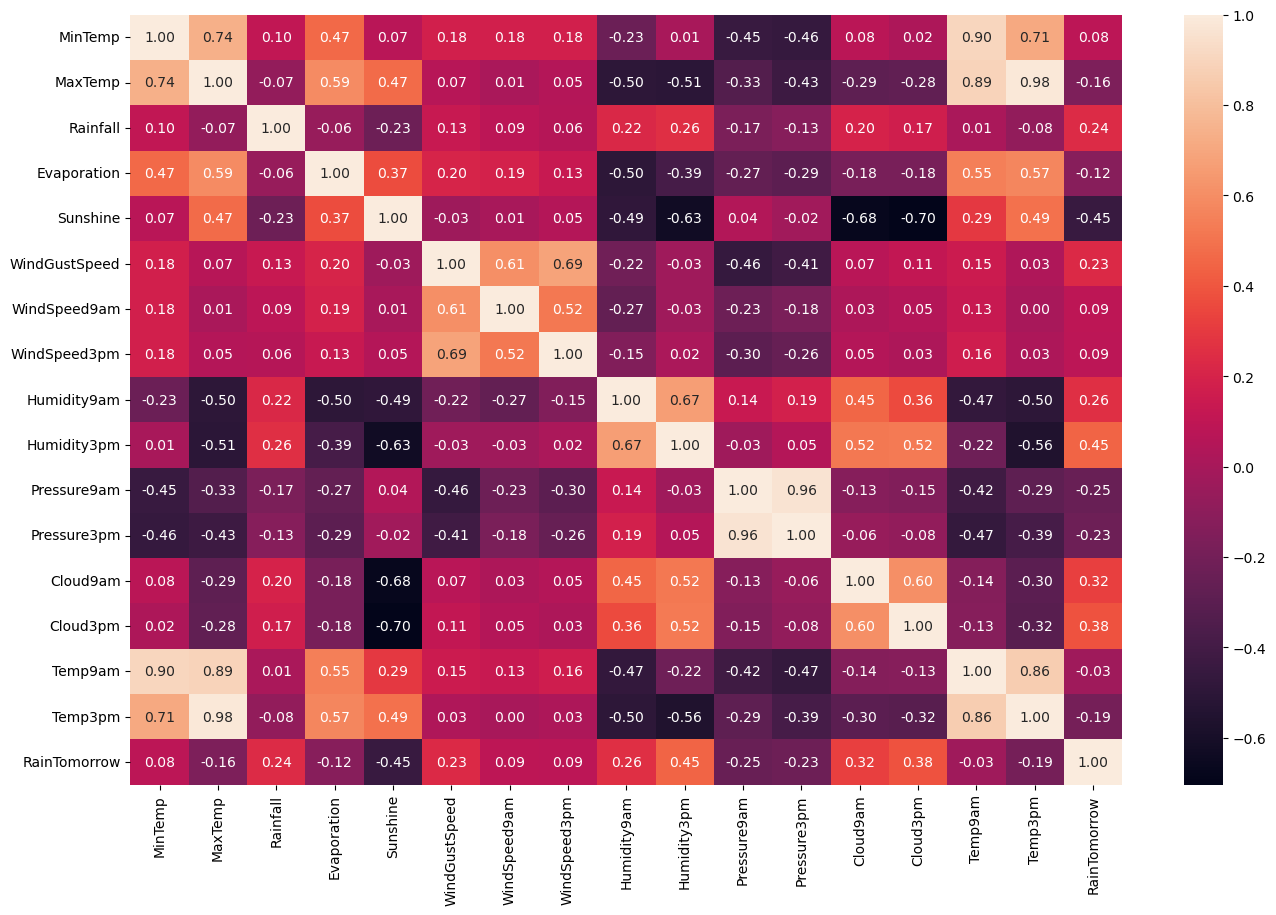

In [18]:
# looking at the correlation heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df_temp[[col for col in df.columns if df[col].dtype != 'O']].corr(), annot = True, fmt = '.2f')
plt.show()

In [19]:
# identifying columns with strong correlation 

correlation_matrix = df_temp[[col for col in df.columns if df[col].dtype != 'O']].corr()

threshold = 0.7
# filter correlations greater than the threshold and not equal to 1
filtered_corr_matrix = (np.abs(correlation_matrix) >= threshold) & (np.abs(correlation_matrix) != 1)

# Use the filtered_corr_matrix to get column names where correlation is above the threshold
high_corr_cols = correlation_matrix.columns[filtered_corr_matrix.any(axis=0)].tolist()

print(high_corr_cols)

['MinTemp', 'MaxTemp', 'Sunshine', 'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm']


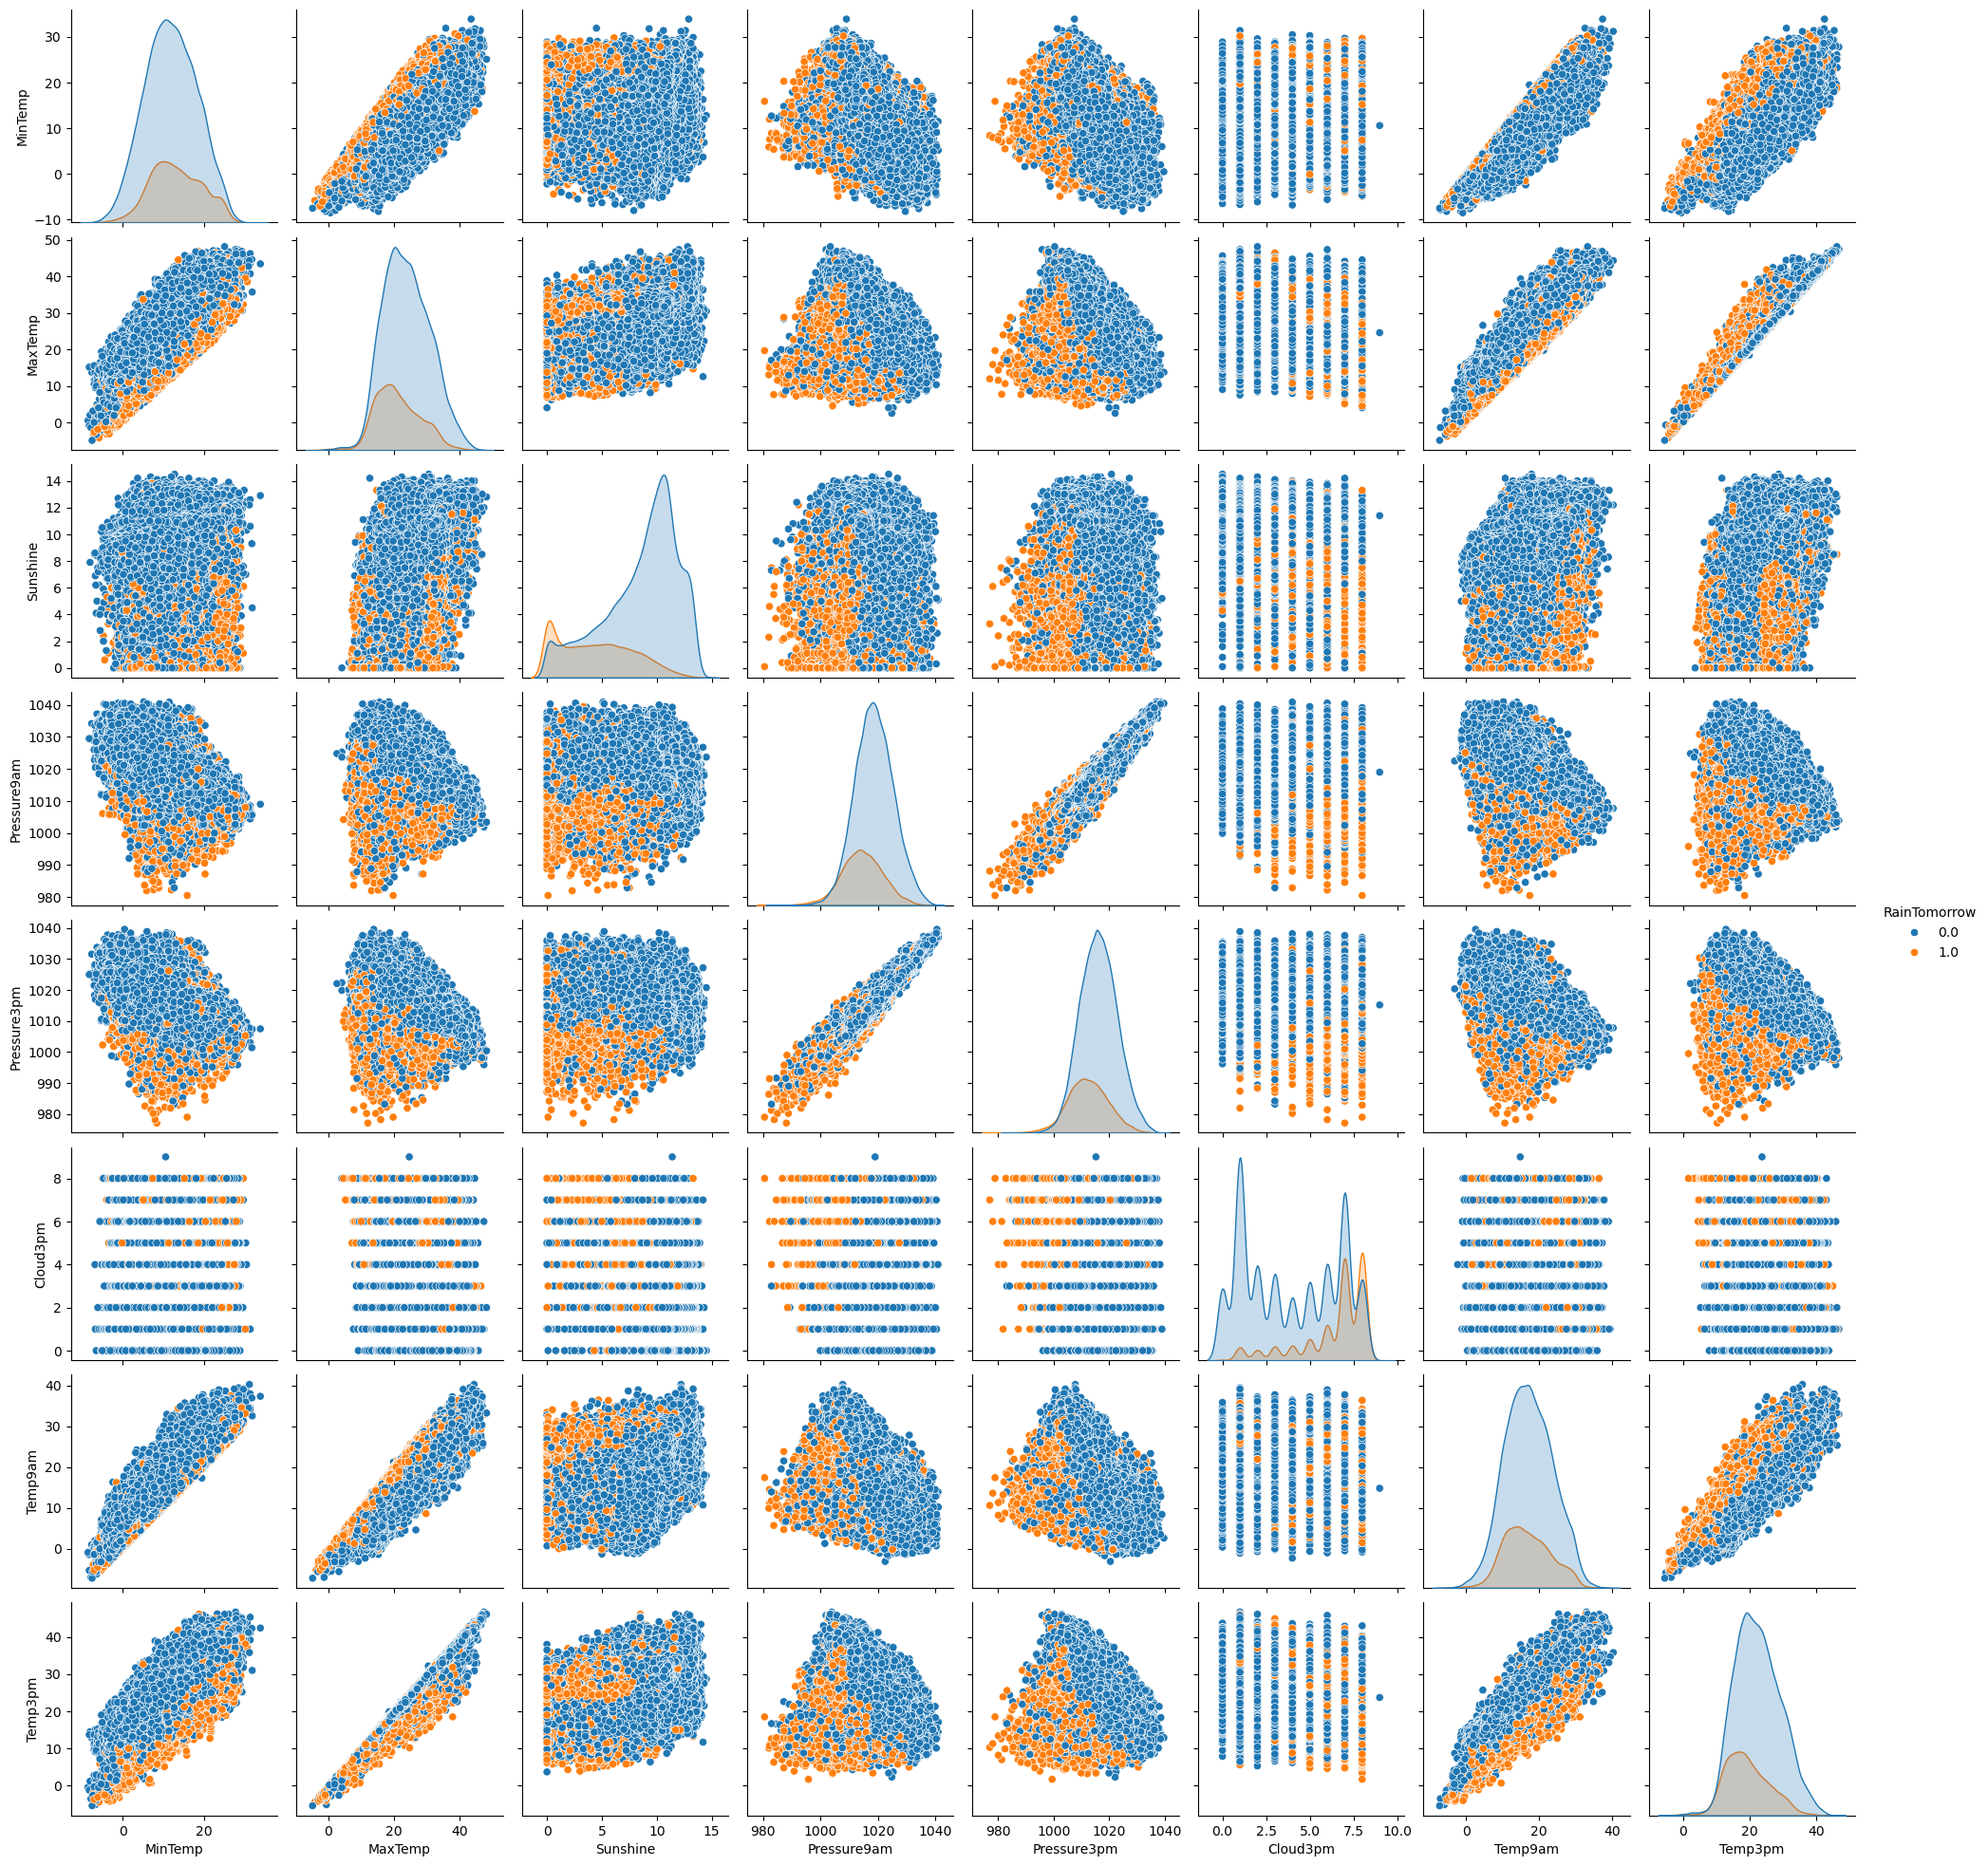

In [20]:
# looking at the pairplot for columns with stong correlation
sns.pairplot(df_temp, vars = (high_corr_cols), hue = 'RainTomorrow')
plt.show()

## Numerical columns

In [22]:
# total missing values in numerical columns
pd.concat([df[num_cols].count(), df[num_cols].isna().sum(), (df[num_cols].isna().sum()/len(df))*100], 
          axis = 1, 
          keys = ["Total Count of Values", "Total Missing Values", "Percent of Missing Values"])

Total Count of Values  Total Missing Values  \
MinTemp                       143975                  1485   
MaxTemp                       144199                  1261   
Rainfall                      142199                  3261   
Evaporation                    82670                 62790   
Sunshine                       75625                 69835   
WindGustSpeed                 135197                 10263   
WindSpeed9am                  143693                  1767   
WindSpeed3pm                  142398                  3062   
Humidity9am                   142806                  2654   
Humidity3pm                   140953                  4507   
Pressure9am                   130395                 15065   
Pressure3pm                   130432                 15028   
Cloud9am                       89572                 55888   
Cloud3pm                       86102                 59358   
Temp9am                       143693                  1767   
Temp3pm                       141851                  3609   

               Percent of Missing Values  
MinTemp                         1.020899  
MaxTemp                         0.866905  
Rainfall                        2.241853  
Evaporation                    43.166506  
Sunshine                       48.009762  
WindGustSpeed                   7.055548  
WindSpeed9am                    1.214767  
WindSpeed3pm                    2.105046  
Humidity9am                     1.824557  
Humidity3pm                     3.098446  
Pressure9am                    10.356799  
Pressure3pm                    10.331363  
Cloud9am                       38.421559  
Cloud3pm                       40.807095  
Temp9am                         1.214767  
Temp3pm                         2.481094

<Axes: >

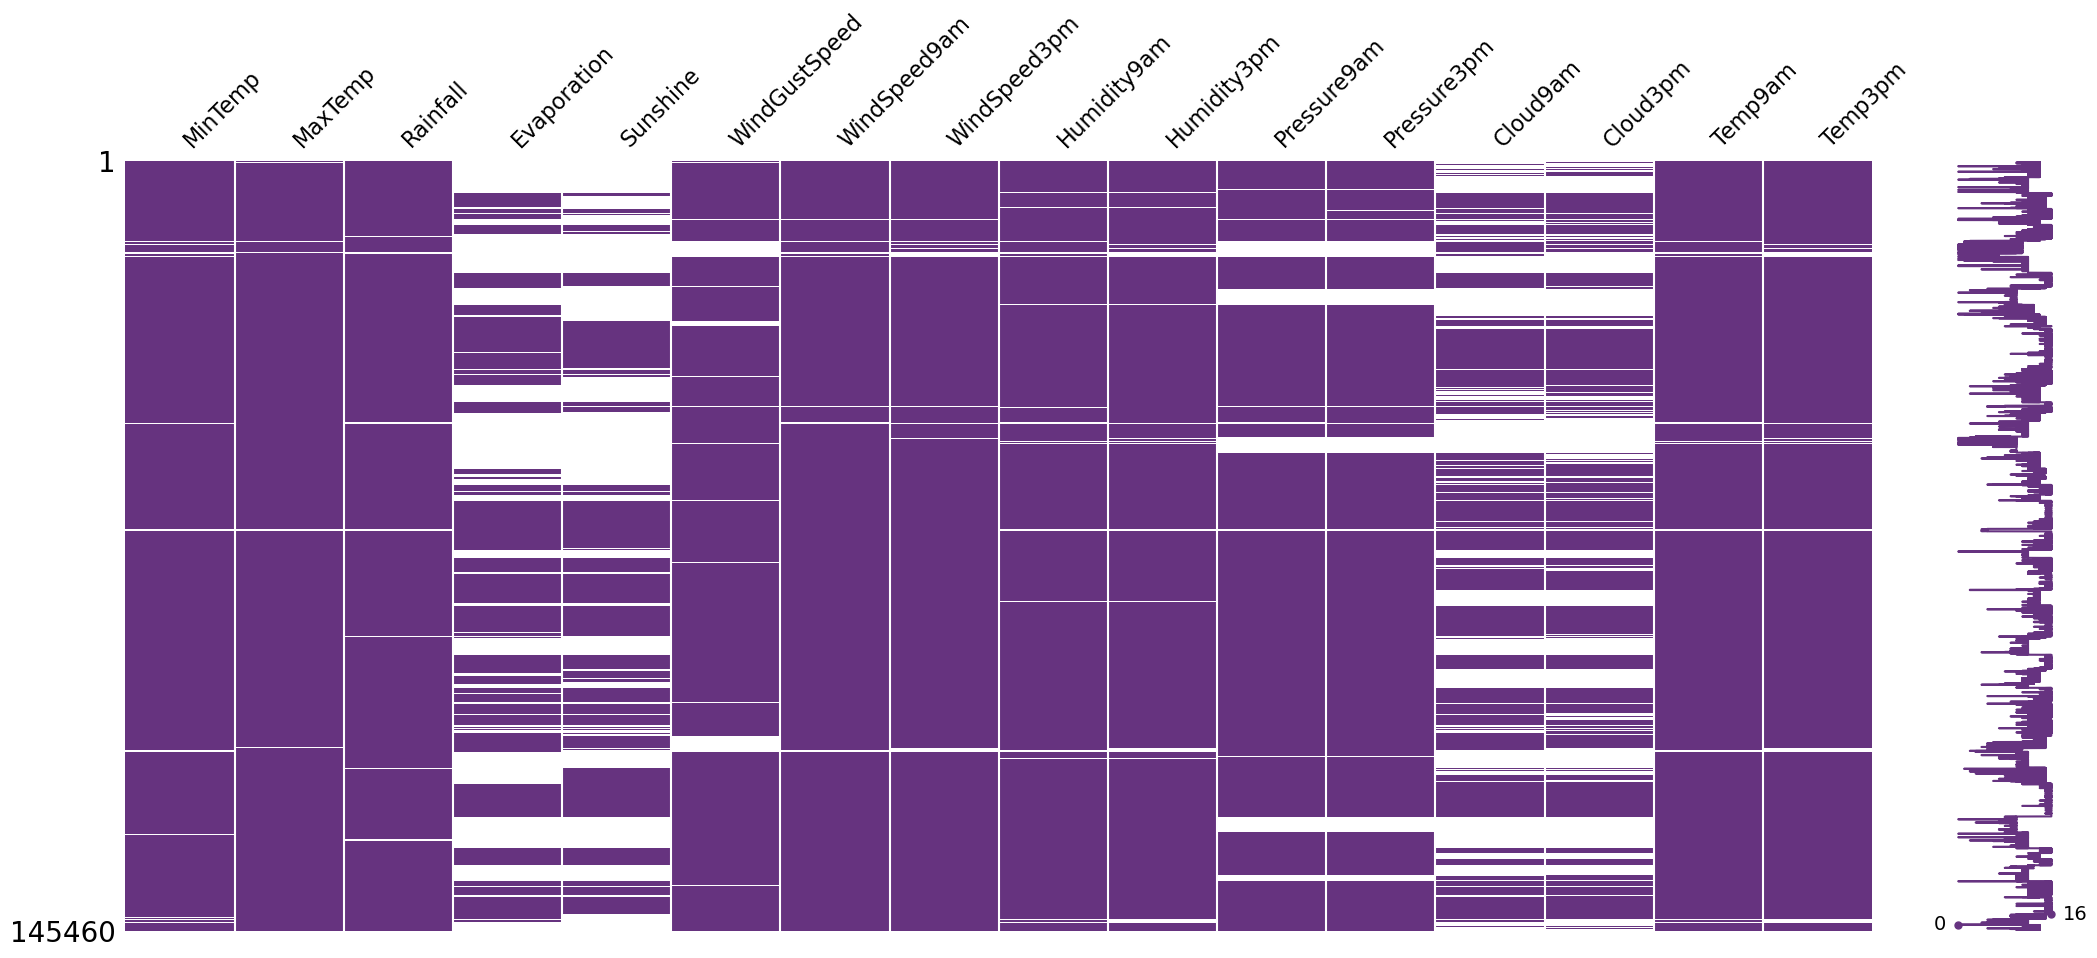

In [23]:
# visualizing missing values in the dataset with numerical columns
msno.matrix(df[num_cols], color=(0.4,0.2,0.5))

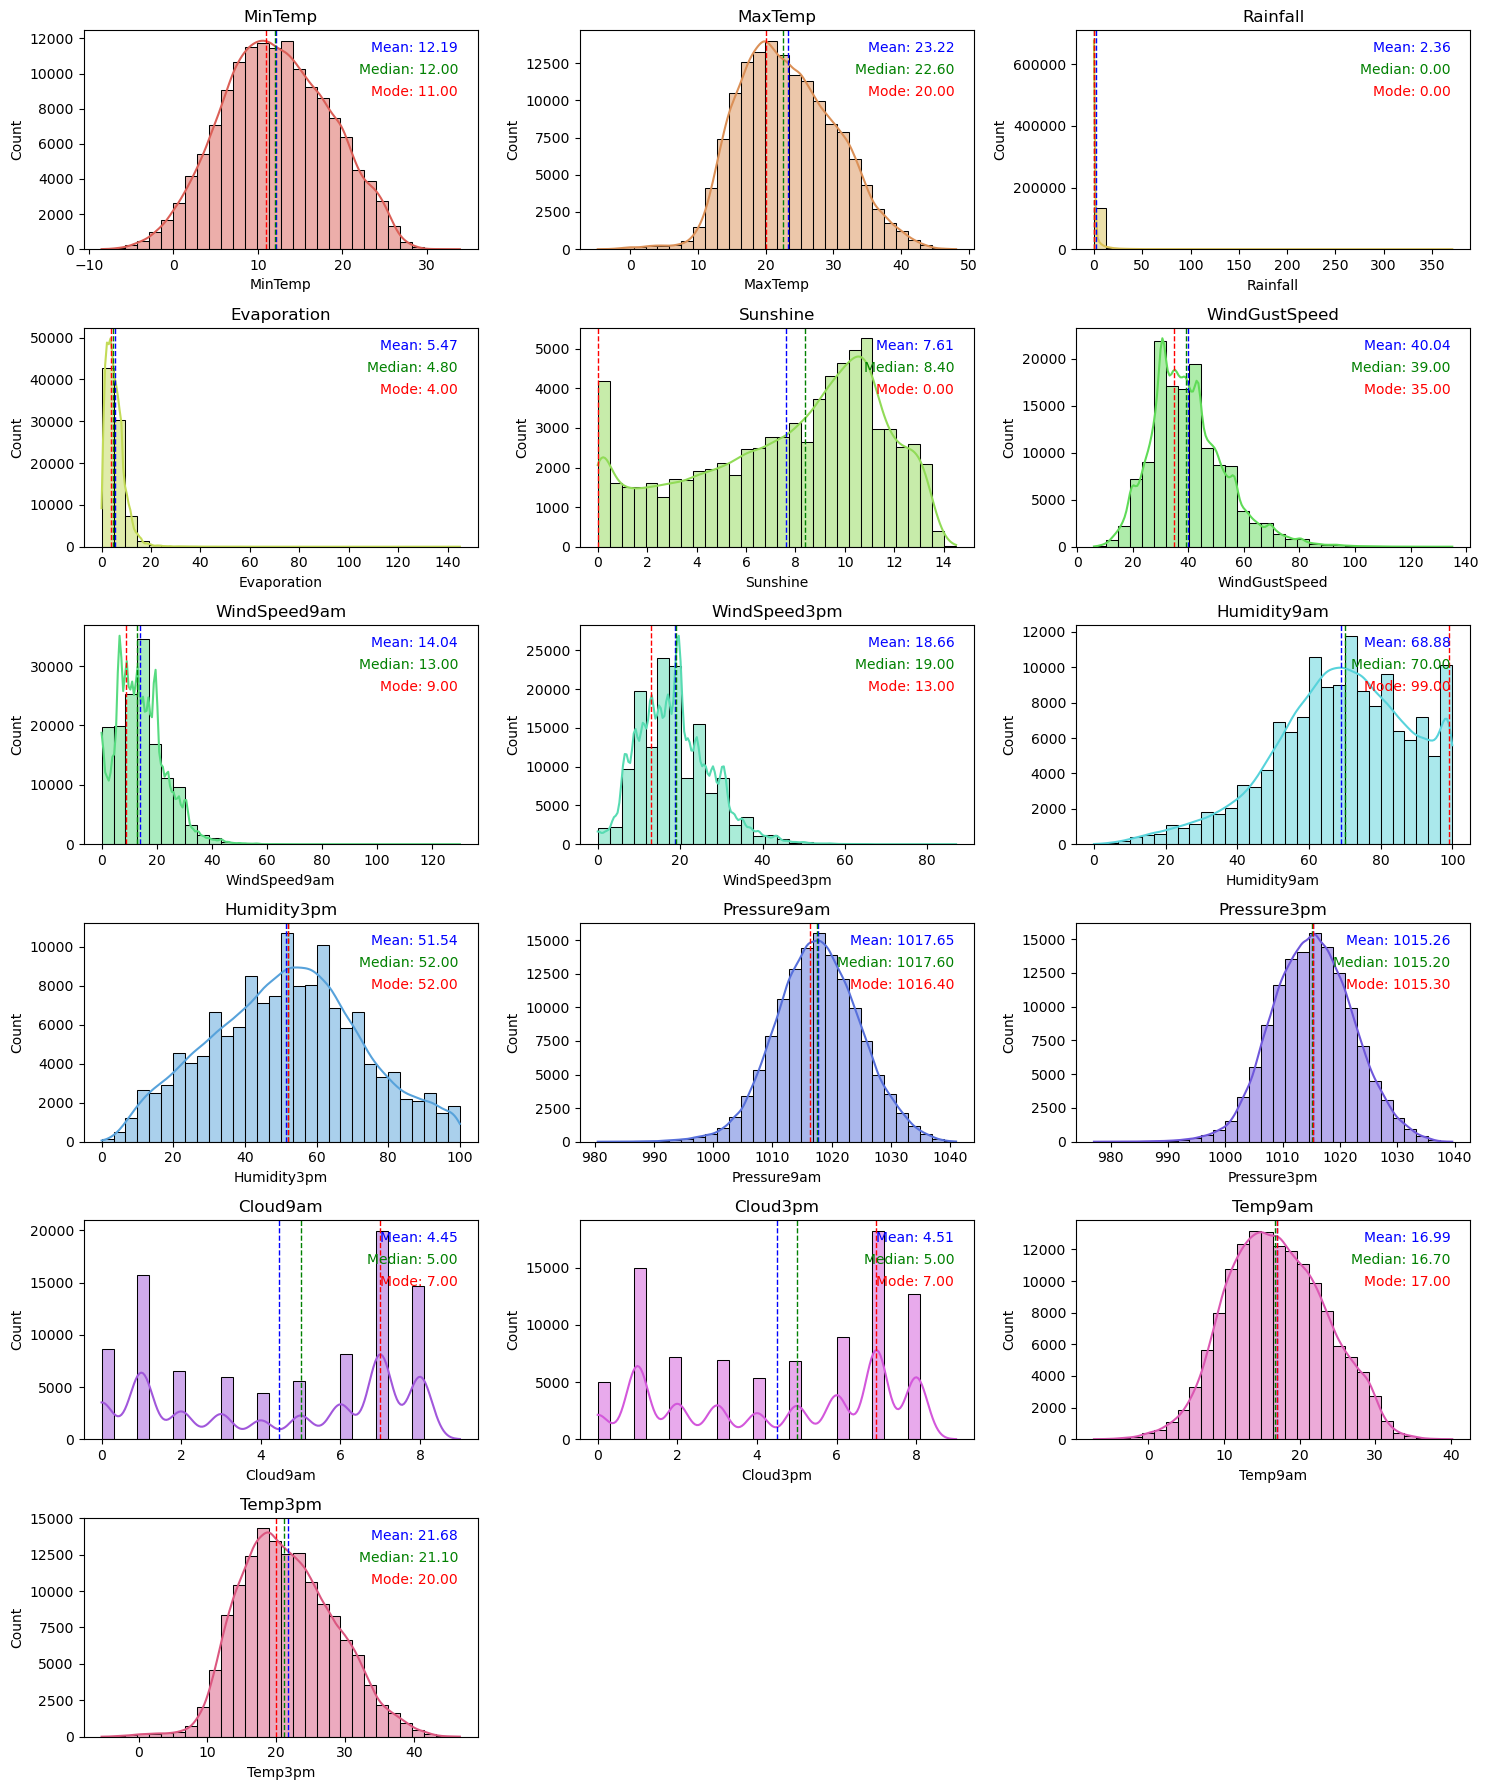

In [24]:
# creating histograms for all the numerical columns

number_cols = len(num_cols)

cols = 3
rows = (number_cols//cols +1)

fig, axis = plt.subplots(nrows = rows, ncols = cols, figsize=(15, 3*rows))

axis = axis.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df, x=df[col], kde=True, bins = 30, color=sns.color_palette('hls', len(num_cols))[i], ax=axis[i])
    axis[i].set_title(col)
    axis[i].set_xlabel(col)
    axis[i].set_ylabel('Count')
    
    axis[i].text(0.95, 0.95, f"Mean: {df[col].mean():.2f}", ha='right', va='top', transform=axis[i].transAxes, fontsize=10, color='blue')
    axis[i].text(0.95, 0.85, f"Median: {df[col].median():.2f}", ha='right', va='top', transform=axis[i].transAxes, fontsize=10, color='green')
    axis[i].text(0.95, 0.75, f"Mode: {df[col].mode()[0]:.2f}", ha='right', va='top', transform=axis[i].transAxes, fontsize=10, color='red')
    
    axis[i].axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=1)
    axis[i].axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1)
    axis[i].axvline(df[col].mode()[0], color='red', linestyle='dashed', linewidth=1)
    
    
for i in range(number_cols, len(axis)):
    axis[i].axis('off')

plt.tight_layout()
plt.show()

In [25]:
# finding mean, median, mode & skewness (note: values may be affected by outliers)
mean, median, mode, skew = [], [], [], []

for i in num_cols:
    mean.append(df[i].mean())
    median.append(df[i].median())
    mode.append(df[i].mode().iloc[0])
    skew.append((df[i].mean() - df[i].median()) / df[i].std())

stats = pd.DataFrame({"Columns": num_cols, "Mean": mean, "Median": median, "Mode": mode, "Skewness": skew})
stats

Columns         Mean  Median    Mode  Skewness
0         MinTemp    12.194034    12.0    11.0  0.030325
1         MaxTemp    23.221348    22.6    20.0  0.087280
2        Rainfall     2.360918     0.0     0.0  0.278474
3     Evaporation     5.468232     4.8     4.0  0.159342
4        Sunshine     7.611178     8.4     0.0 -0.208381
5   WindGustSpeed    40.035230    39.0    35.0  0.076080
6    WindSpeed9am    14.043426    13.0     9.0  0.117037
7    WindSpeed3pm    18.662657    19.0    13.0 -0.038292
8     Humidity9am    68.880831    70.0    99.0 -0.058813
9     Humidity3pm    51.539116    52.0    52.0 -0.022162
10    Pressure9am  1017.649940  1017.6  1016.4  0.007027
11    Pressure3pm  1015.255889  1015.2  1015.3  0.007942
12       Cloud9am     4.447461     5.0     7.0 -0.191378
13       Cloud3pm     4.509930     5.0     7.0 -0.180149
14        Temp9am    16.990631    16.7    17.0  0.044790
15        Temp3pm    21.683390    21.1    20.0  0.084103

From above histograms and table we can assume on what technique to be used to fill missing values in numerical columns,
1. **Mean Imputation** - (Symmetrical, mean ~ median ~ mode, skewness ~ 0) - MinTemp, MaxTemp, WindGustSpeed, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Teamp9am, Pressure3pm, Temp3pm
2. **Median Imputaion** -
   - **Right skewed**: (mean > median > mode, skewness > 0) - Rainfall, Evaporation, , WindSpeed9am, 
   - **Left skewed**: (mean < median < mode, skewness < 0) - Sunshine
3. **Mode Imputaion** - (multiple peeks) - Cloud9am, Cloud3pm

In [27]:
# mean imputation
mean_cols = [ stats['Columns'][i] 
             for i in range(0, len(stats)) 
             if stats['Skewness'][i] <= 0.1 and stats['Skewness'][i] >= -0.1] # columns with near normal distribution

# filling missing values using mean
for i in mean_cols:
    df[i]=df[i].fillna(df[i].mean())


In [28]:
# mode imputation
mode_cols = ['Cloud9am', 'Cloud3pm']

# filling missing values using mode
for i in mode_cols:
    df[i]=df[i].fillna(df[i].mode()[0])

In [29]:
# median imputation
median_cols = [ stats['Columns'][i] 
             for i in range(0, len(stats)) 
             if stats['Skewness'][i] > 0.1 or stats['Skewness'][i] < -0.1] # columns with near normal distribution

# removing cols which are to be processed via mode imputation
median_cols = [col for col in median_cols if col not in mode_cols] 

# filling missing values using median
for i in median_cols:
    df[i]=df[i].fillna(df[i].median())

False


<Axes: >

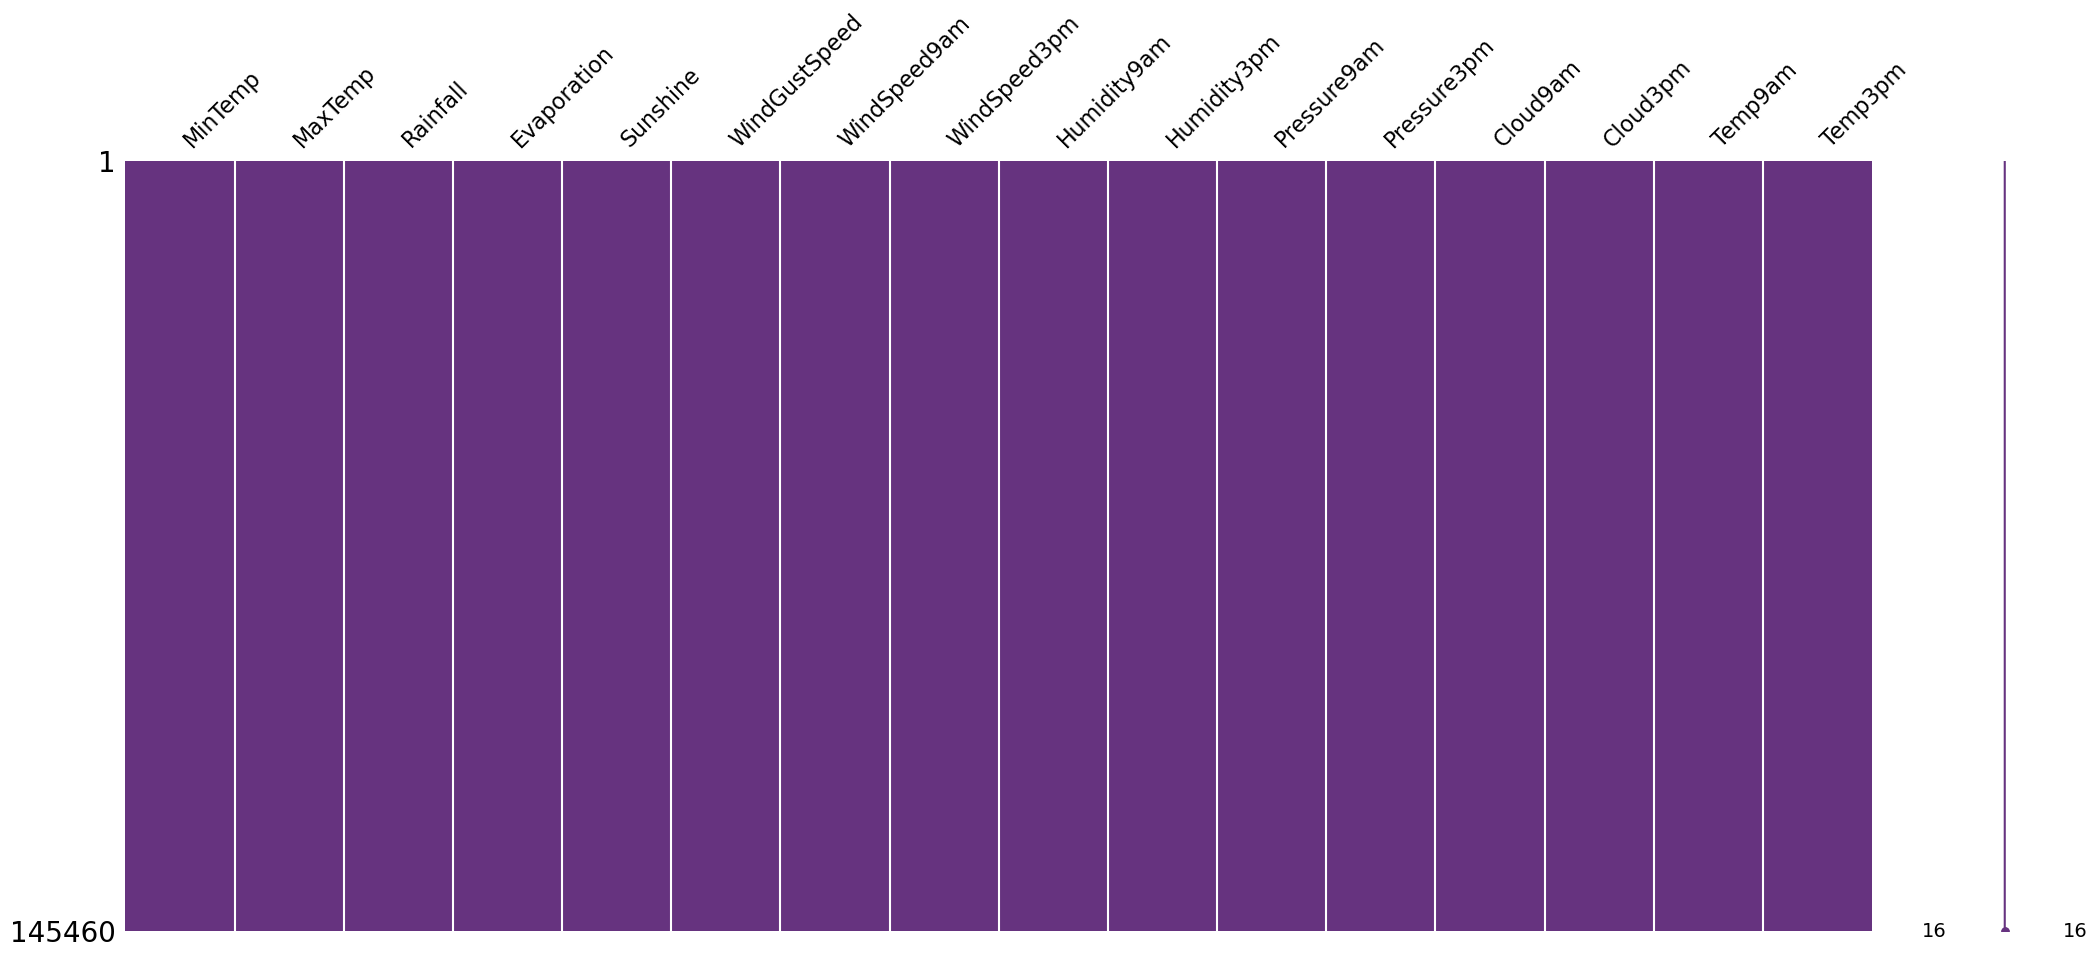

In [30]:
# checking for missing values
print(df[num_cols].isna().max().max())

msno.matrix(df[num_cols],color=(0.4,0.2,0.5))

## Categorical columns

In [32]:
# total missing values in categorical columns 
pd.concat([df[cat_cols].count(), df[cat_cols].isna().sum(), (df[cat_cols].isna().sum() / len(df)) * 100], 
          axis = 1,
         keys = ['Total Count of Values', 'Total Missing Values', 'Percent of Missing Values'])

Total Count of Values  Total Missing Values  \
Date                         145460                     0   
Location                     145460                     0   
WindGustDir                  135134                 10326   
WindDir9am                   134894                 10566   
WindDir3pm                   141232                  4228   
RainToday                    142199                  3261   
RainTomorrow                 142193                  3267   

              Percent of Missing Values  
Date                           0.000000  
Location                       0.000000  
WindGustDir                    7.098859  
WindDir9am                     7.263853  
WindDir3pm                     2.906641  
RainToday                      2.241853  
RainTomorrow                   2.245978

<Axes: >

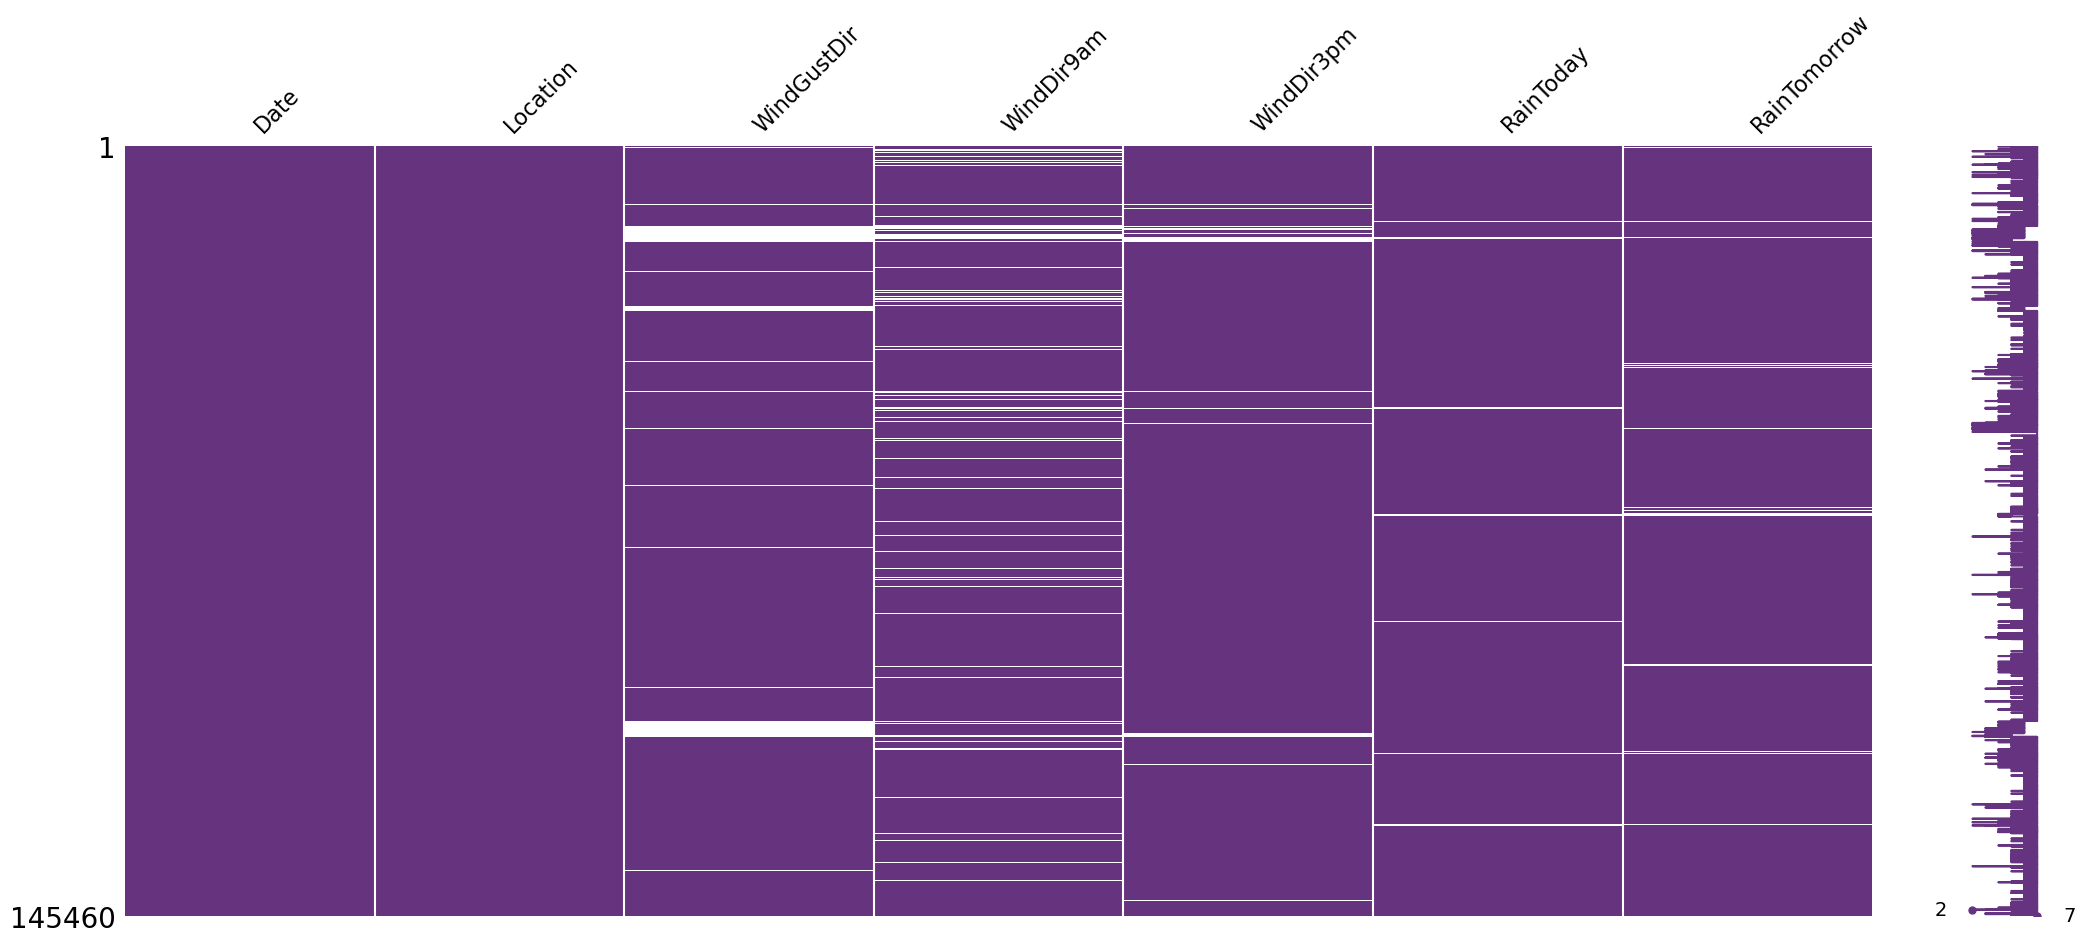

In [33]:
# visualizing missing values

msno.matrix(df[cat_cols],color=(0.4,0.2,0.5))

In [34]:
# columns 'Date', 'location' and 'RainTomorrow' will be processed in upcomming steps
for i in ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
    print(df[i].value_counts(dropna = False))

WindGustDir
NaN    10326
W       9915
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: count, dtype: int64
WindDir9am
N      11758
NaN    10566
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64
WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
NaN     4228
Name: count, dtype: int64
RainToday
No     110319
Yes     31880
NaN      3261
Name: count, dtype: int64


In [35]:
# mode imputation on 'RainToday' column
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])

# replacing 'Yes' with 1 and 'No' with 0
df['RainToday'].replace({'Yes': 1, 'No': 0}, inplace = True)

In [36]:
# verifying
print(f" Missing values: {df['RainToday'].isna().sum()}")
df['RainToday'].sample(5)

 Missing values: 0


293       0
79120     0
123063    0
56712     0
94915     0
Name: RainToday, dtype: int64

In [37]:
# random sampling on 'WindGustDir', 'WindDir9am' and 'WindDir3pm' columns
ran_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

np.random.seed(42)

for col in ran_cols:
    rows_with_nan = df[col].isna()

    unique_values = df[col].dropna().unique()
    random_values = np.random.choice(unique_values, size = rows_with_nan.sum(), replace = True)

    df.loc[rows_with_nan, col] = random_values

In [38]:
# verifying
df[ran_cols].isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [39]:
# lets split date into Day, Month and Year

df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop('Date', axis = 1, inplace = True)

In [40]:
# looking at the changes
df[['Day', 'Month', 'Year']].sample(5)

Day  Month  Year
113464   27      4  2014
39881    10     12  2009
89773    16      3  2016
119452   28      3  2014
13619    30      6  2013

In [41]:
# unique values in 'RainTomorrow'
df['RainTomorrow'].unique()

array([ 0.,  1., nan])

In [42]:
# for missing values in column 'RainTomorrow' we will remove the rows with missing values as 'RainTomorrow' is the target variable
df.dropna(subset=['RainTomorrow'], inplace=True)

In [43]:
# verifying
print(f" Missing values: {df['RainTomorrow'].isna().sum()}")
df['RainTomorrow'].sample(5)

 Missing values: 0


30957     0.0
16435     0.0
103509    0.0
25970     0.0
48311     1.0
Name: RainTomorrow, dtype: float64

<Axes: >

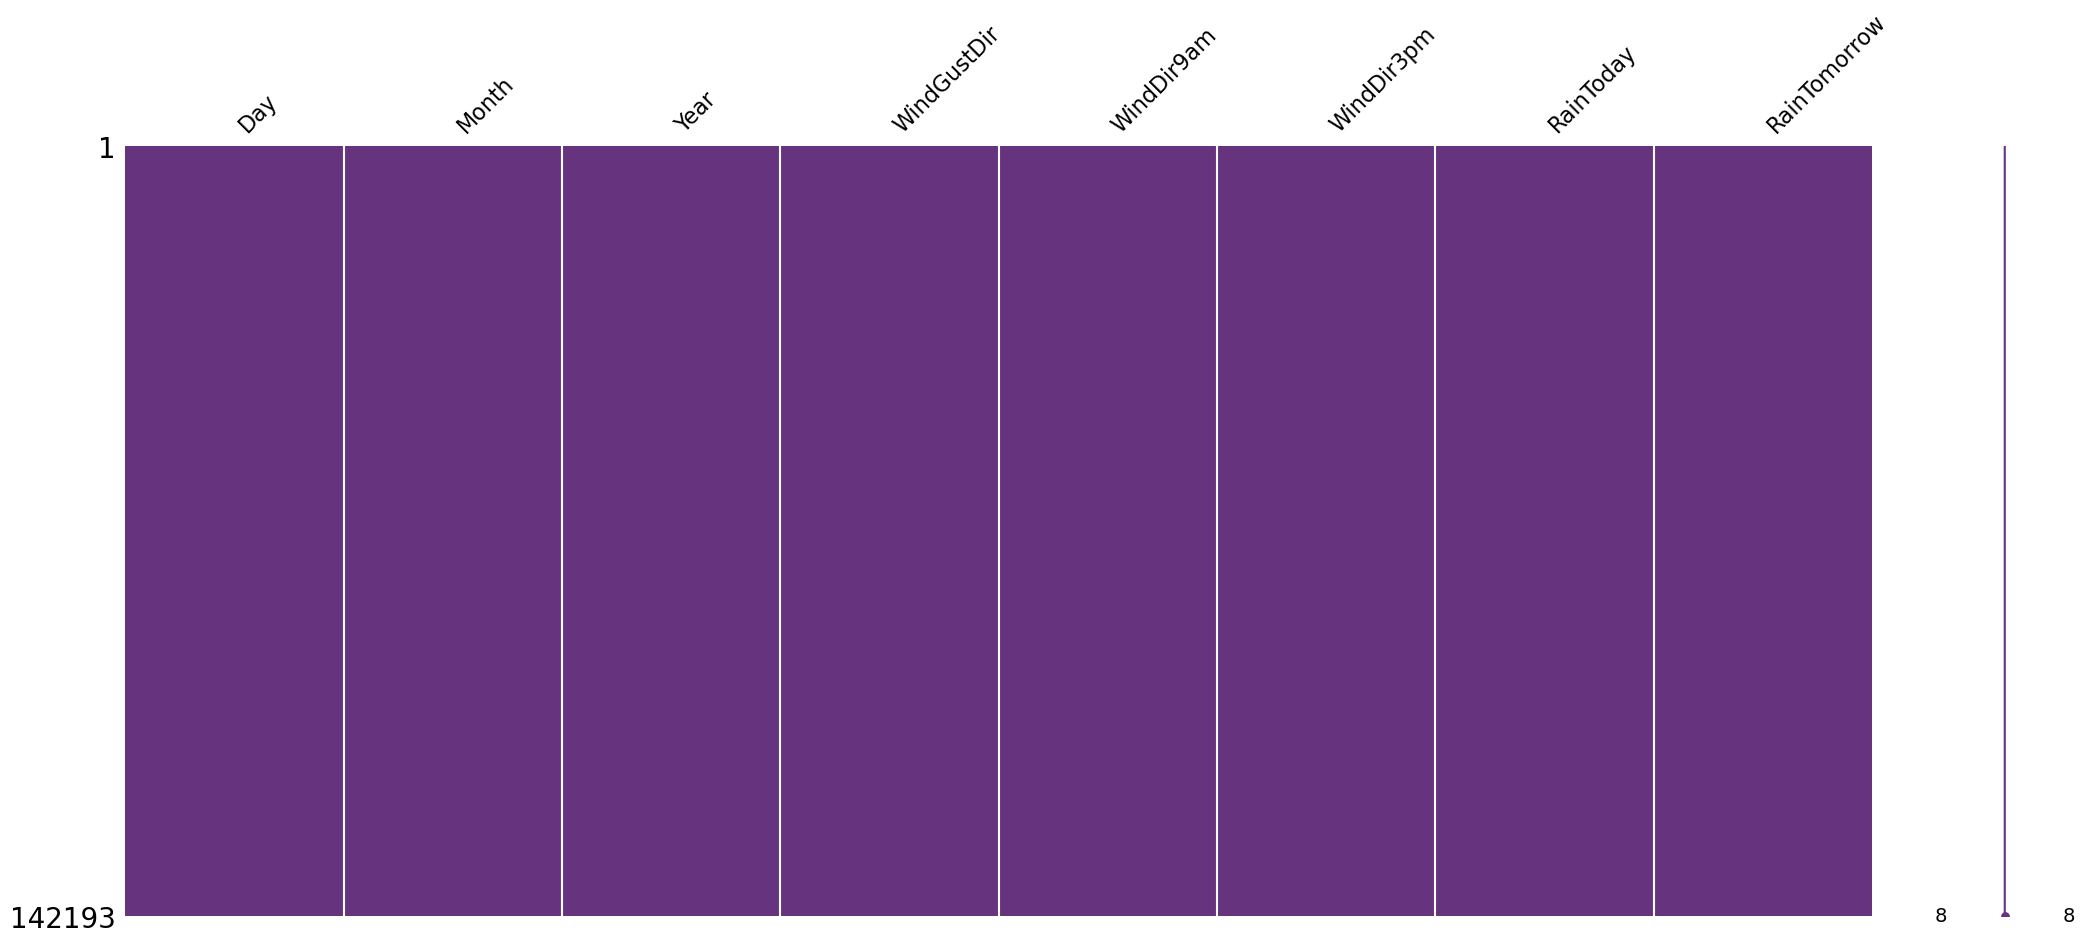

In [44]:
# visual verification on missing values
msno.matrix(df[['Day', 'Month', 'Year', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']],color=(0.4,0.2,0.5))

## One-Hot Encoding

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-null  fl

In [47]:
# one-hot encoding all categorical cols except day, month and year
encode_columns = [col for col in df.columns if df[col].dtype == 'O']

for col in encode_columns:
    df = pd.get_dummies(df, columns=[col])

df.replace({True: 1, False: 0}, inplace = True)

In [48]:
df.sample(5)

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
51402   0.000000  16.900000       0.0          4.8       8.4           48.0   
27135   6.600000  20.700000       0.0          4.8       8.4           13.0   
22529  19.800000  24.700000       0.0          4.4       8.5           37.0   
18700  12.194034  23.221348       0.0          4.8       8.4           24.0   
22636  17.200000  21.400000      11.0          1.2       5.2           41.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
51402           4.0          11.0    81.000000    38.000000  ...   
27135           2.0           7.0    80.000000    44.000000  ...   
22529          26.0          20.0    80.000000    73.000000  ...   
18700          13.0          15.0    68.880831    51.539116  ...   
22636          11.0          20.0    89.000000    83.000000  ...   

       WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
51402               0              0             0              0   
27135               0              0             0              0   
22529               0              0             0              0   
18700               0              0             0              0   
22636               0              0             1              0   

       WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
51402               0               0              0             0   
27135               0               0              0             0   
22529               0               0              0             0   
18700               0               0              0             0   
22636               0               0              0             0   

       WindDir3pm_WNW  WindDir3pm_WSW  
51402               0               0  
27135               0               0  
22529               0               0  
18700               0               0  
22636               0               0  

[5 rows x 118 columns]

In [49]:
df.shape

(142193, 118)

## Rain Tomorrow (Target) Distribution

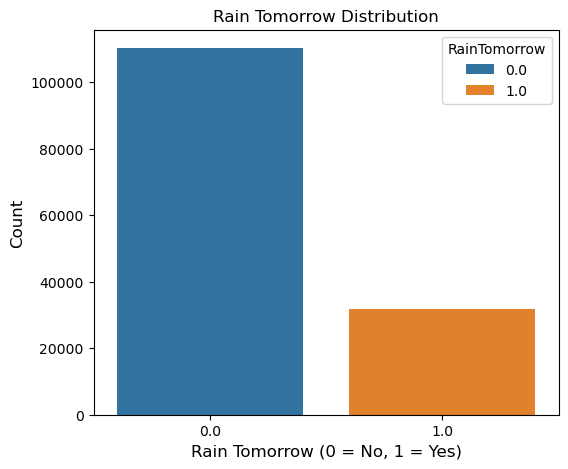

In [51]:
# visulaizing the 'RainTomorrow' distribution
plt.figure(figsize = (6,5))
sns.countplot(data=df, x='RainTomorrow', hue = 'RainTomorrow')

plt.title('Rain Tomorrow Distribution', fontsize=12)
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [52]:
pd.concat([df['RainTomorrow'].value_counts(), (df['RainTomorrow'].value_counts()/len(df)) * 100], axis = 1, keys = ['Count', 'Percent'])

Count    Percent
RainTomorrow                   
0.0           110316  77.581878
1.0            31877  22.418122

It can be that the dataset is not well balanced. RainTomorrow with value 0 indicating 'No' is dominant and can cause bias in the prediction. Hence we will oversample the datadet to make it balanced.

In [54]:
# oversampling df to make it balanced
df_yes = df[df['RainTomorrow'] == 1]
df_no = df[df['RainTomorrow'] == 0]

oversamp_df_yes = resample(df_yes, replace = True, n_samples = len(df_no), random_state = 42)

df = pd.concat([df_no, oversamp_df_yes])

df.shape

(220632, 118)

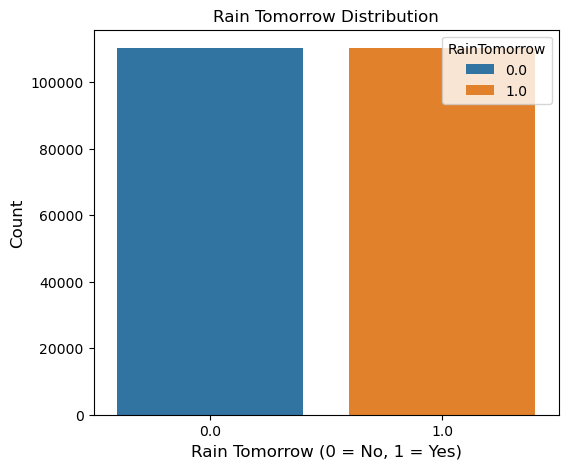

In [55]:
# visulaizing the 'RainTomorrow' distribution
plt.figure(figsize = (6,5))
sns.countplot(data=df, x='RainTomorrow', hue = 'RainTomorrow')

plt.title('Rain Tomorrow Distribution', fontsize=12)
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [56]:
pd.concat([df['RainTomorrow'].value_counts(), (df['RainTomorrow'].value_counts()/len(df)) * 100], axis = 1, keys = ['Count', 'Percent'])

Count  Percent
RainTomorrow                 
0.0           110316     50.0
1.0           110316     50.0

## Train Test Split
Spliting the dataset to Train and Test datasets

In [58]:
# splitting dataset to train and test datasets

X = df.drop(columns = 'RainTomorrow')
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Train dataset shape = {X_train.shape}")
print(f"Test dataset shape = {X_test.shape}")

Train dataset shape = (176505, 117)
Test dataset shape = (44127, 117)


## Decision Tree Classifier

In [60]:
# initializing and training decision Tree classification model
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [61]:
# predicting on test dataset
y_pred = clf_tree.predict(X_test)

In [62]:
# evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.28%


In [63]:
# checking of overfitting
print(f"Accuracy on test dataset: {accuracy_score(y_test, clf_tree.predict(X_test))*100:.2f}%")
print(f"Accuracy on train dataset: {accuracy_score(y_train, clf_tree.predict(X_train))*100:.2f}%")

Accuracy on test dataset: 91.28%
Accuracy on train dataset: 100.00%


From above it is observed that the accuracy on train data is 100% and the difference between the test and train accuracies, this indicates there might be a potential overfit of the model 

In [65]:
# lets check the consitancy of the model accross different splits of the dataset
cv_scores = cross_val_score(clf_tree, X_train, y_train, cv=5)  # 5-fold cross-validation

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.89255262 0.8895782  0.89507379 0.89280757 0.89331747]
Mean Cross-Validation Score: 0.892665930143622


From above cross validation the accuracy is consitant across different data splits and the average is comparable to the the accuracy score obtaines from earlier. Hence lets try adjusting max_depth paramenter.

In [67]:
# finding what was the max_depth the model used 
print("Maximum Depth of the Trained Decision Tree:", clf_tree.tree_.max_depth)

Maximum Depth of the Trained Decision Tree: 46


In [68]:
# lets train the model with different values of max depth from 10 to 40 increamenting in 10s
i = 10
stats = []

while i <= 40:
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
    clf_tree.fit(X_train, y_train)
    print(f"Training with max depth: {i} Done!")
    stats.append({'Max Depth': i,
                  'Test Accuracy Score': round(accuracy_score(y_test, clf_tree.predict(X_test)) * 100, 2),
                  'Train Accuracy Score': round(accuracy_score(y_train, clf_tree.predict(X_train)) * 100, 2) 
                 })
    i += 5

Training with max depth: 10 Done!
Training with max depth: 15 Done!
Training with max depth: 20 Done!
Training with max depth: 25 Done!
Training with max depth: 30 Done!
Training with max depth: 35 Done!
Training with max depth: 40 Done!


   Max Depth  Test Accuracy Score  Train Accuracy Score
0         10                78.99                 79.95
1         15                82.46                 86.57
2         20                86.68                 93.05
3         25                89.17                 97.07
4         30                90.68                 99.14
5         35                91.07                 99.80
6         40                91.19                 99.98


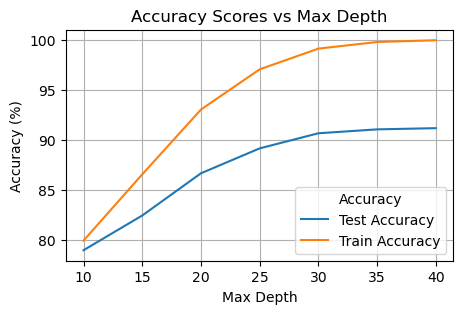

In [69]:
# lets visualize the above to get a better understanding
print(pd.DataFrame(stats))

plt.figure(figsize=(5, 3))
sns.lineplot(data=pd.DataFrame(stats), x='Max Depth', y='Test Accuracy Score', label='Test Accuracy')
sns.lineplot(data=pd.DataFrame(stats), x='Max Depth', y='Train Accuracy Score', label='Train Accuracy')

plt.title('Accuracy Scores vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.legend(title="Accuracy", loc="best")
plt.grid(True)
plt.show()

It can be observed that the gain in accuracy score of the train data becomes almost negligible after 30, Lets look into max_depth from 25 to 30

In [71]:
# training model wih max depth from 25 to 30 increament in 1s
i = 25
stats = []

while i <= 30:
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
    clf_tree.fit(X_train, y_train)
    print(f"Training with max depth: {i} Done!")
    stats.append({'Max Depth': i,
                  'Test Accuracy Score': round(accuracy_score(y_test, clf_tree.predict(X_test)) * 100, 2),
                  'Train Accuracy Score': round(accuracy_score(y_train, clf_tree.predict(X_train)) * 100, 2) 
                 })
    i += 1

Training with max depth: 25 Done!
Training with max depth: 26 Done!
Training with max depth: 27 Done!
Training with max depth: 28 Done!
Training with max depth: 29 Done!
Training with max depth: 30 Done!


   Max Depth  Test Accuracy Score  Train Accuracy Score
0         25                89.17                 97.07
1         26                89.59                 97.66
2         27                90.08                 98.12
3         28                90.27                 98.61
4         29                90.50                 98.89
5         30                90.68                 99.14


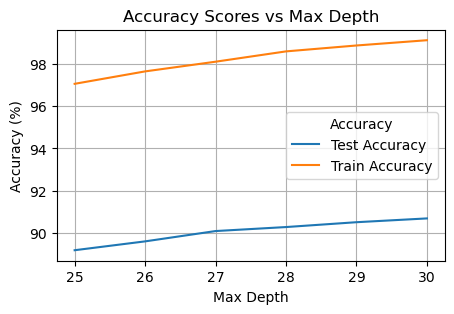

In [72]:
# visualizing the result
print(pd.DataFrame(stats))

plt.figure(figsize=(5, 3))
sns.lineplot(data=pd.DataFrame(stats), x='Max Depth', y='Test Accuracy Score', label='Test Accuracy')
sns.lineplot(data=pd.DataFrame(stats), x='Max Depth', y='Train Accuracy Score', label='Train Accuracy')

plt.title('Accuracy Scores vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.legend(title="Accuracy", loc="best")
plt.grid(True)
plt.show()

From above it is observed that the difference between train accuracy and test accuracy is consistant along changeing Max Depth, Hence for optimal value we go with Max Depth = 27

In [73]:
start_time = time.time()

# training model with max_depth = 27
clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=27, random_state=42)
clf_tree.fit(X_train, y_train)

train_end_time = time.time()

# predicting on test dataset
y_pred_tree = clf_tree.predict(X_test)

pred_end_time = time.time()

train_time_tree = train_end_time - start_time
pred_time_tree = pred_end_time - train_end_time
total_time_tree = pred_end_time - start_time

# function used to convert time taken in seconds to hr, min & sec
def format_time(seconds):
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(hours)}h {int(minutes)}min {seconds:.2f}s"

print(f"Training Time: {format_time(train_time_tree)}")
print(f"Evaluation Time: {format_time(pred_time_tree)}")
print(f"Total Time Taken: {format_time(total_time_tree)}")

# evaluating the performance of the model
print(classification_report(y_test, y_pred_tree))

Training Time: 0h 0min 5.35s
Evaluation Time: 0h 0min 0.05s
Total Time Taken: 0h 0min 5.39s
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89     21960
         1.0       0.86      0.96      0.91     22167

    accuracy                           0.90     44127
   macro avg       0.91      0.90      0.90     44127
weighted avg       0.91      0.90      0.90     44127



In [74]:
# 5 fold cross validating 
cv_scores = cross_val_score(clf_tree, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.88042832 0.8847908  0.8822413  0.88238294 0.8827512 ]
Mean Cross-Validation Score: 0.8825189088127814


From above cross validation the accuracy is consitant across different data splits.

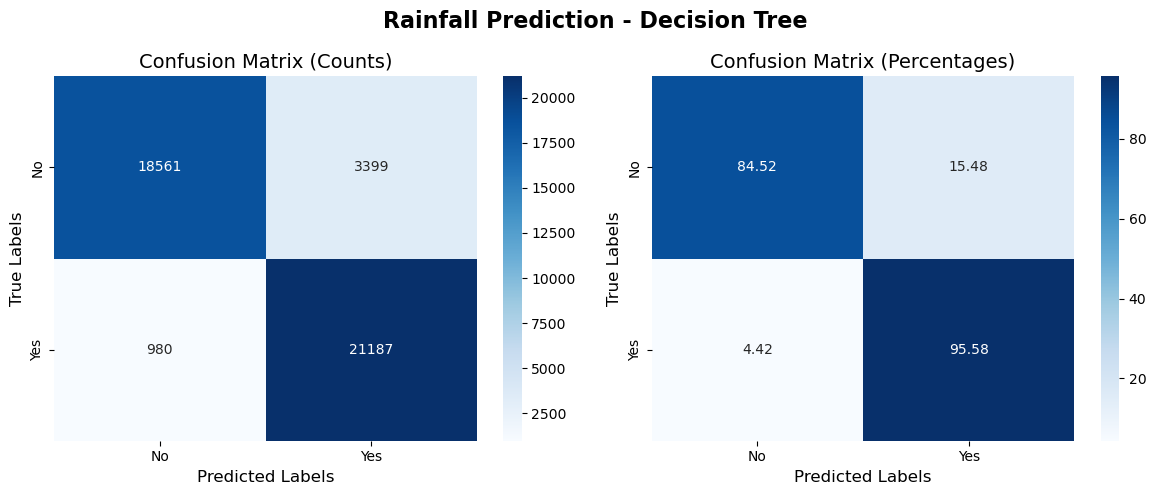

In [75]:
# visulaizing confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix with counts
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot confusion matrix with percentages
sns.heatmap(confusion_matrix(y_test, y_pred_tree, normalize='true')*100, annot=True, fmt='.2f', cmap='Blues', ax=axes[1], xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14)
axes[1].set_xlabel('Predicted Labels', fontsize=12)
axes[1].set_ylabel('True Labels', fontsize=12)

plt.suptitle('Rainfall Prediction - Decision Tree', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Random Forest 

In [77]:
# initializing and training decision Tree classification model
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# predicting on test dataset
y_pred = clf_rf.predict(X_test)

In [79]:
# evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# checking of overfitting
print(f"Accuracy on test dataset: {accuracy_score(y_test, clf_rf.predict(X_test))*100:.2f}%")
print(f"Accuracy on train dataset: {accuracy_score(y_train, clf_rf.predict(X_train))*100:.2f}%")

Accuracy on test dataset: 94.94%
Accuracy on train dataset: 100.00%


It can be observed that without specifying max depth the model tends to overfit which can be been seen from the 100% accuray score on train dataset. Similar to Decision Tree lets try to get a optimal max depth value.

In [80]:
# training model wih max depth from 10 to 40 increament in 10s
i = 10
stats = []

while i <= 50:
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=42)
    clf_rf.fit(X_train, y_train)
    print(f"Training with max depth: {i} Done!")
    stats.append({'Max Depth': i,
                  'Test Accuracy Score': round(accuracy_score(y_test, clf_rf.predict(X_test)) * 100, 2),
                  'Train Accuracy Score': round(accuracy_score(y_train, clf_rf.predict(X_train)) * 100, 2) 
                 })
    i += 10

Training with max depth: 10 Done!
Training with max depth: 20 Done!
Training with max depth: 30 Done!
Training with max depth: 40 Done!
Training with max depth: 50 Done!


   Max Depth  Test Accuracy Score  Train Accuracy Score
0         10                79.27                 79.97
1         20                90.33                 95.78
2         30                94.47                 99.96
3         40                94.86                100.00
4         50                94.98                100.00


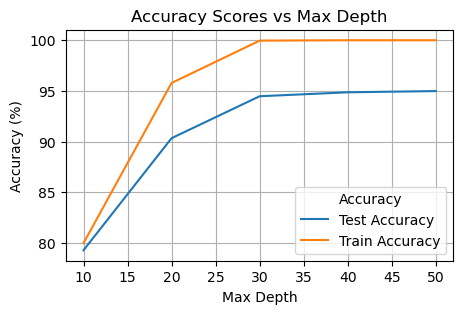

In [81]:
# visualizing the result
print(pd.DataFrame(stats))

plt.figure(figsize=(5, 3))
sns.lineplot(data=pd.DataFrame(stats), x='Max Depth', y='Test Accuracy Score', label='Test Accuracy')
sns.lineplot(data=pd.DataFrame(stats), x='Max Depth', y='Train Accuracy Score', label='Train Accuracy')

plt.title('Accuracy Scores vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.legend(title="Accuracy", loc="best")
plt.grid(True)
plt.show()

It can be observed that above 30 the gains are insignificat and the plot is flat, so lets look closely ant the range 20 to 30

In [82]:
# training model wih max depth from 20 to 30 increament in 1s
i = 20
stats = []

while i <= 30:
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=42)
    clf_rf.fit(X_train, y_train)
    print(f"Training with max depth: {i} Done!")
    stats.append({'Max Depth': i,
                  'Test Accuracy Score': round(accuracy_score(y_test, clf_rf.predict(X_test)) * 100, 2),
                  'Train Accuracy Score': round(accuracy_score(y_train, clf_rf.predict(X_train)) * 100, 2) 
                 })
    i += 1

Training with max depth: 20 Done!
Training with max depth: 21 Done!
Training with max depth: 22 Done!
Training with max depth: 23 Done!
Training with max depth: 24 Done!
Training with max depth: 25 Done!
Training with max depth: 26 Done!
Training with max depth: 27 Done!
Training with max depth: 28 Done!
Training with max depth: 29 Done!
Training with max depth: 30 Done!


    Max Depth  Test Accuracy Score  Train Accuracy Score
0          20                90.33                 95.78
1          21                91.16                 96.90
2          22                91.87                 97.81
3          23                92.56                 98.60
4          24                93.06                 99.14
5          25                93.43                 99.38
6          26                93.81                 99.68
7          27                94.10                 99.79
8          28                94.28                 99.90
9          29                94.33                 99.92
10         30                94.47                 99.96


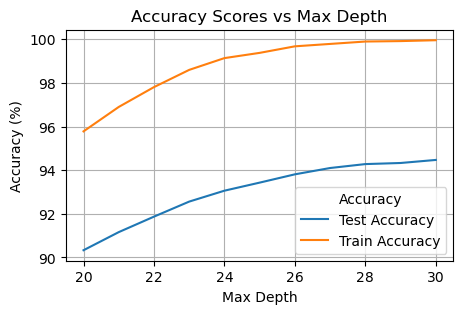

In [83]:
# visualizing the result
print(pd.DataFrame(stats))

plt.figure(figsize=(5, 3))
sns.lineplot(data=pd.DataFrame(stats), x='Max Depth', y='Test Accuracy Score', label='Test Accuracy')
sns.lineplot(data=pd.DataFrame(stats), x='Max Depth', y='Train Accuracy Score', label='Train Accuracy')

plt.title('Accuracy Scores vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.legend(title="Accuracy", loc="best")
plt.grid(True)
plt.show()

Similar to decision tree the optimal max depth seems like to be 27.

In [84]:
start_time = time.time()

# training model with max_depth = 27
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=26, random_state=42)
clf_rf.fit(X_train, y_train)

train_end_time = time.time()

# predicting on test dataset
y_pred_rf = clf_rf.predict(X_test)

pred_end_time = time.time()

train_time_rf = train_end_time - start_time
pred_time_rf = pred_end_time - train_end_time
total_time_rf = pred_end_time - start_time

print(f"Training Time: {format_time(train_time_rf)}")
print(f"Evaluation Time: {format_time(pred_time_rf)}")
print(f"Total Time Taken: {format_time(total_time_rf)}")

# evaluating the performance of the model
print(classification_report(y_test, y_pred_rf))

Training Time: 0h 0min 51.50s
Evaluation Time: 0h 0min 1.65s
Total Time Taken: 0h 0min 53.15s
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94     21960
         1.0       0.91      0.97      0.94     22167

    accuracy                           0.94     44127
   macro avg       0.94      0.94      0.94     44127
weighted avg       0.94      0.94      0.94     44127



In [85]:
# 5 fold cross validating 
cv_scores = cross_val_score(clf_rf, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.92184357 0.92243846 0.92399649 0.92493131 0.92402482]
Mean Cross-Validation Score: 0.9234469278490695


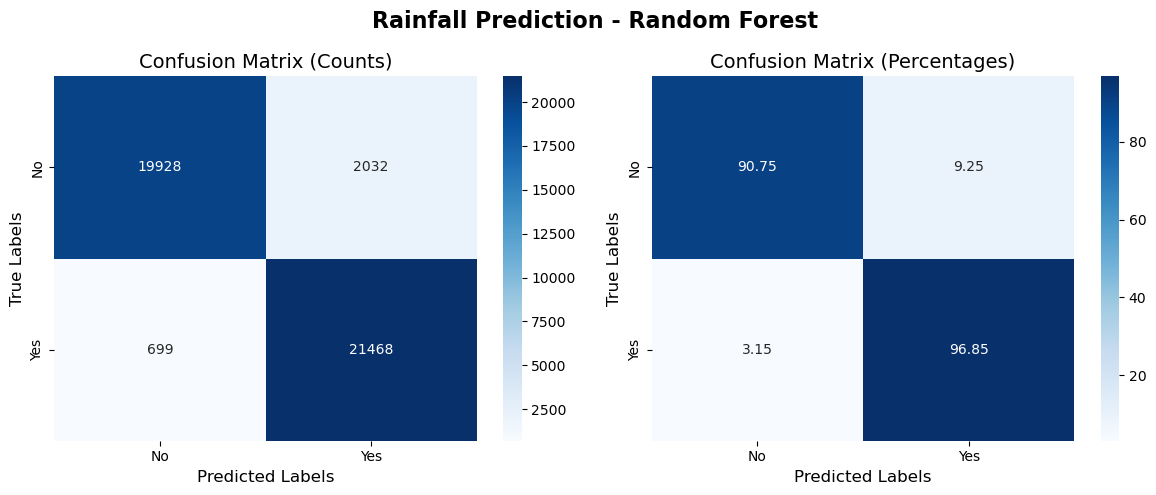

In [86]:
# visulaizing confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix with counts
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot confusion matrix with percentages
sns.heatmap(confusion_matrix(y_test, y_pred_rf, normalize='true')*100, annot=True, fmt='.2f', cmap='Blues', ax=axes[1], xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14)
axes[1].set_xlabel('Predicted Labels', fontsize=12)
axes[1].set_ylabel('True Labels', fontsize=12)

plt.suptitle('Rainfall Prediction - Random Forest', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## K Nearest Neighbours Classifier

In [88]:
# lets normalize the data set as kNN classifier is sensitive to extreem range of value which we do have in the dataset
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

Finding the K value in KNN is the tedious process. A low k value can lead to overfitting and a high k value can lead to underfitting. So first we will try to find a optimal value for k

In [89]:
# lets try to find optimal value for k 
k = 1
stats = []

while k <= 20:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(X_train_scaled, y_train)
    scores = cross_val_score(clf_knn, X_train_scaled, y_train, cv=5, scoring='accuracy',)
    print(f"Training with k value: {k} Done!")
    stats.append({'K Value': k,
                  'Test Accuracy Score': round(accuracy_score(y_test, clf_knn.predict(X_test_scaled)) * 100, 2),
                  'Train Accuracy Score': round(accuracy_score(y_train, clf_knn.predict(X_train_scaled)) * 100, 2) ,
                  'Mean Cross Validation Score': round(scores.mean() * 100, 2)
                 })
    k += 1

Training with k value: 1 Done!
Training with k value: 2 Done!
Training with k value: 3 Done!
Training with k value: 4 Done!
Training with k value: 5 Done!
Training with k value: 6 Done!
Training with k value: 7 Done!
Training with k value: 8 Done!
Training with k value: 9 Done!
Training with k value: 10 Done!
Training with k value: 11 Done!
Training with k value: 12 Done!
Training with k value: 13 Done!
Training with k value: 14 Done!
Training with k value: 15 Done!
Training with k value: 16 Done!
Training with k value: 17 Done!
Training with k value: 18 Done!
Training with k value: 19 Done!
Training with k value: 20 Done!


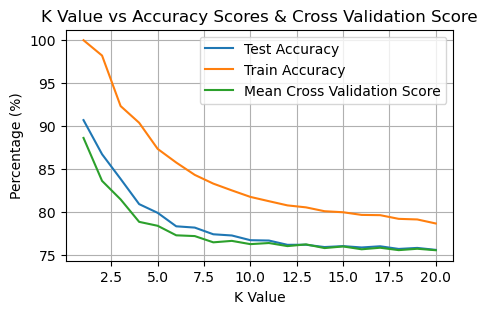

In [90]:
# visulizing the result 
plt.figure(figsize=(5, 3))
sns.lineplot(data=pd.DataFrame(stats), x='K Value', y='Test Accuracy Score', label='Test Accuracy')
sns.lineplot(data=pd.DataFrame(stats), x='K Value', y='Train Accuracy Score', label='Train Accuracy')
sns.lineplot(data=pd.DataFrame(stats), x='K Value', y='Mean Cross Validation Score', label='Mean Cross Validation Score')

plt.title('K Value vs Accuracy Scores & Cross Validation Score')
plt.xlabel('K Value')
plt.ylabel('Percentage (%)')
plt.legend(loc="best")
plt.grid(True)
plt.show()

Form above the following can be observed,
1. Accuracy score is high at starting and falls as K value incleases.
2. Test accuracy and mean of 5 fold cross validation follows almost the same curve.
3. Odd number K values perform better compared to even numbers, this expected as the model is trying to classify between 2 target values (binary classification)
4. Above 5 the accuracy scores flattens and there seem to be no abvantage in going with bigger number
5. Choosing value for k,
    - When considering 3 and 5, in both cases the differrence between test and train accuracy seems to be more than 5%
          - Has high test accuracy
          - Looks like a bit overfitting

In [92]:
# lets choose k = 3 and train our model
k = 3

start_time = time.time()

clf_knn = KNeighborsClassifier(n_neighbors=k)
clf_knn.fit(X_train_scaled, y_train)

train_end_time = time.time()

# predicting on test dataset
y_pred_knn = clf_knn.predict(X_test_scaled)

pred_end_time = time.time()

train_time_knn = train_end_time - start_time
pred_time_knn = pred_end_time - train_end_time
total_time_knn = pred_end_time - start_time

print(f"Training Time: {format_time(train_time_knn)}")
print(f"Evaluation Time: {format_time(pred_time_knn)}")
print(f"Total Time Taken: {format_time(total_time_knn)}")

# evaluating the performance of the model
print(classification_report(y_test, y_pred_knn))

Training Time: 0h 0min 0.10s
Evaluation Time: 0h 0min 12.90s
Total Time Taken: 0h 0min 13.00s
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82     21960
         1.0       0.80      0.91      0.85     22167

    accuracy                           0.84     44127
   macro avg       0.85      0.84      0.84     44127
weighted avg       0.85      0.84      0.84     44127



In [93]:
# 5 fold cross validating 
cv_scores = cross_val_score(clf_knn, X_train_scaled, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.81535934 0.81550098 0.81263987 0.81292315 0.81496275]
Mean Cross-Validation Score: 0.8142772159428912


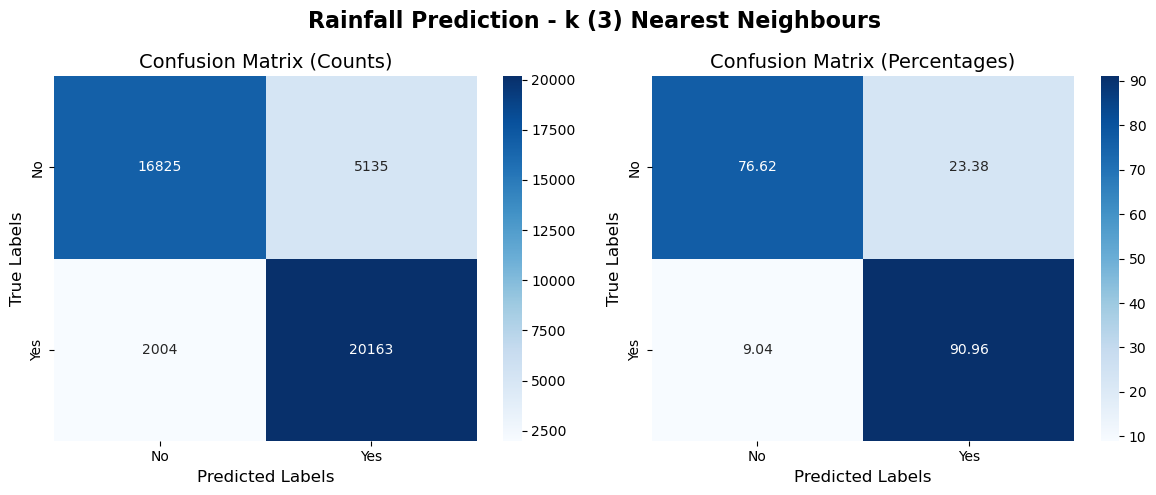

In [94]:
# visulaizing confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix with counts
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot confusion matrix with percentages
sns.heatmap(confusion_matrix(y_test, y_pred_knn, normalize='true')*100, annot=True, fmt='.2f', cmap='Blues', ax=axes[1], xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14)
axes[1].set_xlabel('Predicted Labels', fontsize=12)
axes[1].set_ylabel('True Labels', fontsize=12)

plt.suptitle('Rainfall Prediction - k (3) Nearest Neighbours', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Logistic Regression

In [96]:
# logistic regression also requires normalized dataset, hence we will use X_train_scaled and X_test_scaled
# we will use solver = 'liblinear' as it is optimized for binar classification
clf_log = LogisticRegression(C=0.5, solver='liblinear', penalty='l1')
clf_log.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

In [97]:
y_pred = clf_log.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7862306524350171
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79     21960
         1.0       0.80      0.77      0.78     22167

    accuracy                           0.79     44127
   macro avg       0.79      0.79      0.79     44127
weighted avg       0.79      0.79      0.79     44127



In [98]:
print(accuracy_score(y_train, clf_log.predict(X_train_scaled)))

0.7867765785671794


It can be observed that the accuracy score seem to be low compared to other model. Lets try to find a optimal value of parameters. We want to check multiple parameters hence we will use the GridSearchCV from sklearn with iterated the process for all the possible combinations of the input parameters.

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l1','l2']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [100]:
results = pd.DataFrame(grid_search.cv_results_)
results["mean_test_score"] *= 100

# Filter results for penalty 'l1' and 'l2'
results_l1 = results[results["param_penalty"] == "l1"]
results_l2 = results[results["param_penalty"] == "l2"]


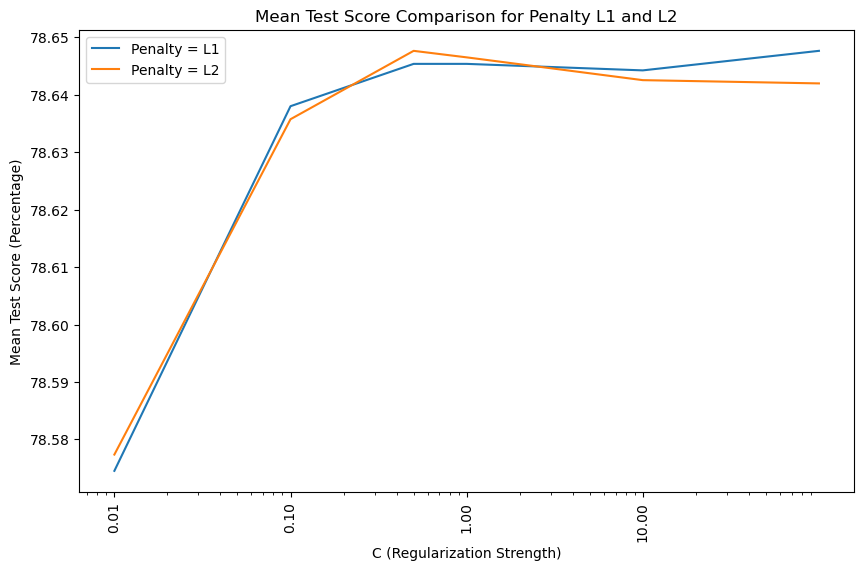

In [101]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_l1, x='param_C', y='mean_test_score', label='Penalty = L1')
sns.lineplot(data=results_l2, x='param_C', y='mean_test_score', label='Penalty = L2')
plt.title("Mean Test Score Comparison for Penalty L1 and L2")
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Mean Test Score (Percentage)")
plt.xscale('log')
plt.xticks([0.01, 0.1, 1, 10], rotation=90)
formatter = FuncFormatter(lambda x, _: f'{x:.2f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.legend(loc="best")
plt.show()

In [102]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.786476303787428


In [103]:
# using the best params form above 
start_time = time.time()

clf_log = LogisticRegression(C=1, solver='liblinear', penalty='l2')
clf_log.fit(X_train_scaled, y_train)

train_end_time = time.time()

# predicting on test dataset
y_pred_log = clf_log.predict(X_test_scaled)

pred_end_time = time.time()

train_time_log = train_end_time - start_time
pred_time_log = pred_end_time - train_end_time
total_time_log = pred_end_time - start_time

print(f"Training Time: {format_time(train_time_log)}")
print(f"Evaluation Time: {format_time(pred_time_log)}")
print(f"Total Time Taken: {format_time(total_time_log)}")

# evaluating the performance of the model
print(classification_report(y_test, y_pred_log))

Training Time: 0h 0min 4.69s
Evaluation Time: 0h 0min 0.02s
Total Time Taken: 0h 0min 4.71s
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79     21960
         1.0       0.80      0.77      0.78     22167

    accuracy                           0.79     44127
   macro avg       0.79      0.79      0.79     44127
weighted avg       0.79      0.79      0.79     44127



In [104]:
# 5 fold cross validating 
cv_scores = cross_val_score(clf_log, X_train_scaled, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.78567179 0.78793802 0.78502025 0.78592674 0.78776805]
Mean Cross-Validation Score: 0.7864649726636639


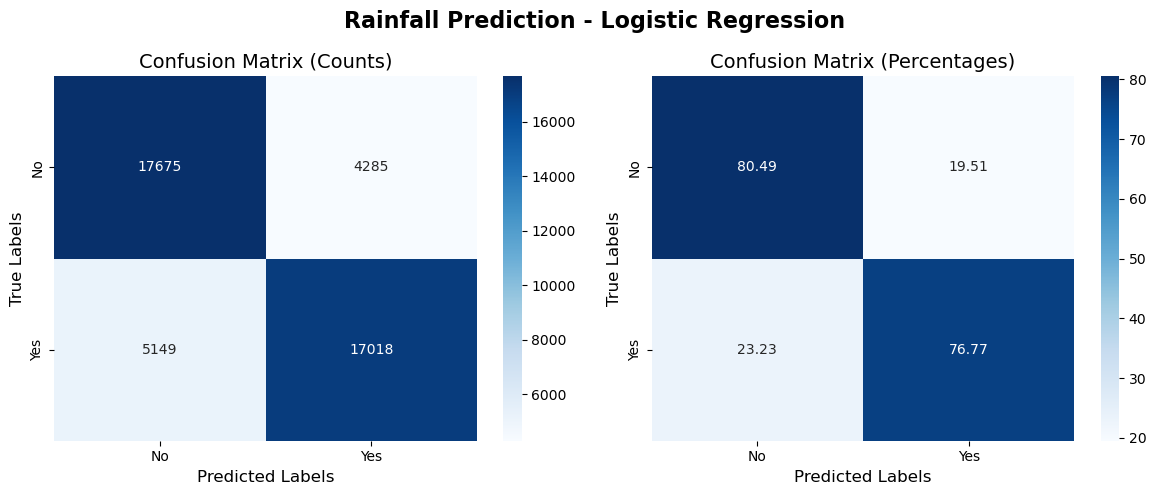

In [105]:
# visulaizing confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix with counts
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14)
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('True Labels', fontsize=12)

# Plot confusion matrix with percentages
sns.heatmap(confusion_matrix(y_test, y_pred_log, normalize='true')*100, annot=True, fmt='.2f', cmap='Blues', ax=axes[1], xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
axes[1].set_title('Confusion Matrix (Percentages)', fontsize=14)
axes[1].set_xlabel('Predicted Labels', fontsize=12)
axes[1].set_ylabel('True Labels', fontsize=12)

plt.suptitle('Rainfall Prediction - Logistic Regression', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Model Comparision

In [107]:
# function to calculate metrics
def calculate_metrics(model, y_true, y_pred, train_time, pred_time):
    accuracy = accuracy_score(y_true, y_pred)*100
    precision = precision_score(y_true, y_pred)*100
    recall = recall_score(y_true, y_pred)*100
    return {"Model": model, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "Train Time": train_time, "Prediction Time": pred_time}

# Calculating metrics for each model
metrics_tree = calculate_metrics("Decision Tree", y_test, y_pred_tree, train_time_tree, pred_time_tree)
metrics_rf = calculate_metrics("Random Forest", y_test, y_pred_rf, train_time_rf, pred_time_rf)
metrics_knn = calculate_metrics("K Nearest Neighours", y_test, y_pred_knn, train_time_knn, pred_time_knn)
metrics_log = calculate_metrics("Logistic Regression", y_test, y_pred_log, train_time_log, pred_time_log)

results_df = pd.DataFrame([metrics_tree, metrics_rf, metrics_knn, metrics_log])
results_df

Model   Accuracy  Precision     Recall  Train Time  \
0        Decision Tree  90.076370  86.175059  95.579014    5.345789   
1        Random Forest  93.811045  91.353191  96.846664   51.504930   
2  K Nearest Neighours  83.821696  79.701953  90.959534    0.095425   
3  Logistic Regression  78.620799  79.885462  76.771778    4.692695   

   Prediction Time  
0         0.047807  
1         1.647588  
2        12.904326  
3         0.015841

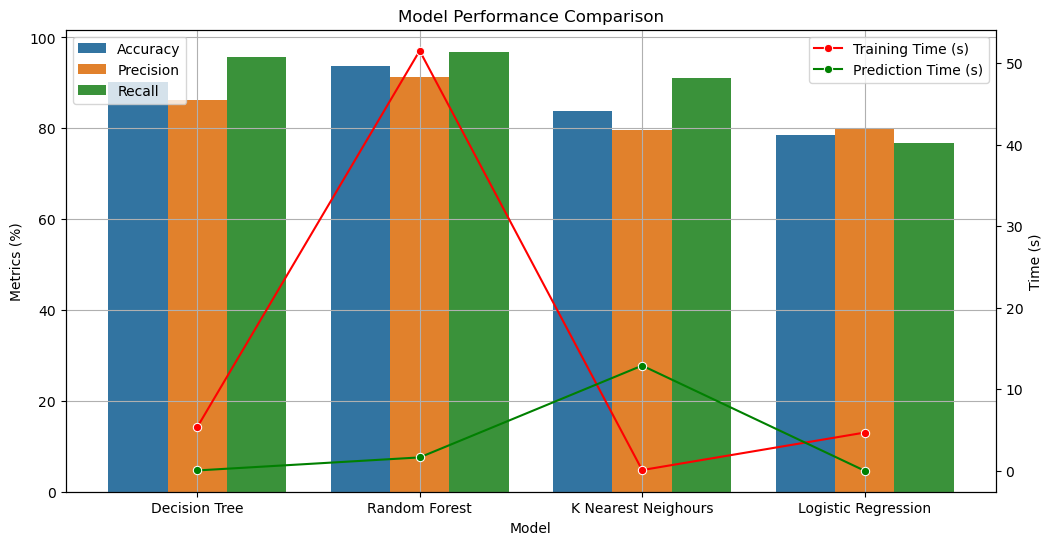

In [109]:
# visulizing the results
results_reshaped = results_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot( data=results_reshaped[results_reshaped["Metric"].isin(["Accuracy", "Precision", "Recall"])], x="Model", y="Value", hue="Metric", ax=ax1)

ax1.set_ylabel("Metrics (%)")
ax1.set_xlabel("Model")
ax1.set_title("Model Performance Comparison")
ax1.legend(loc="upper left")
ax1.grid(True)

ax2 = ax1.twinx()
sns.lineplot( data=results_df, x="Model", y="Train Time", marker="o", color="red", label="Training Time (s)", ax=ax2)
sns.lineplot( data=results_df, x="Model", y="Prediction Time", marker="o", color="green", label="Prediction Time (s)", ax=ax2)

ax2.set_ylabel("Time (s)")
ax2.legend(loc="upper right")

plt.show()

## Conclusion

It can be observed that **Decision Tree** and **Random Forest** have performed well compared to other model. Though Random Forest has the largest time taken to train for but the time taken to predict is resonable. 

Having feeback on how to improve? contact me at jamesjebersonm@gmail.com